In [35]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint

In [36]:
def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    

    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

In [37]:
def gradient_descent(f, grad_f, x0, tolf, tolx, kmax, alpha= 1, bt= False):
    xk = x0
    f_vals = [f(xk)]
    grad_vals = [grad_f(xk)]
    err_vals = [np.linalg.norm(grad_f(xk))]
    x_vals = [xk]
    iteration = 0

    while iteration < kmax:
        x_prec = xk

        xk = xk - alpha * grad_f(xk)

        if bt:
            alpha = backtracking(f, grad_f, xk)

        x_vals.append(xk)
        f_vals.append(f(xk))
        grad_vals.append(grad_f(xk))       
        err_vals.append(np.linalg.norm(grad_f(xk)))

        iteration+=1

        if np.linalg.norm(grad_f(xk)) < tolf * np.linalg.norm(grad_f(x0)):
            break

        if np.linalg.norm(xk - x_prec) < tolx * np.linalg.norm(x0):
            break

    return (x_vals, iteration, f_vals, grad_vals, err_vals)

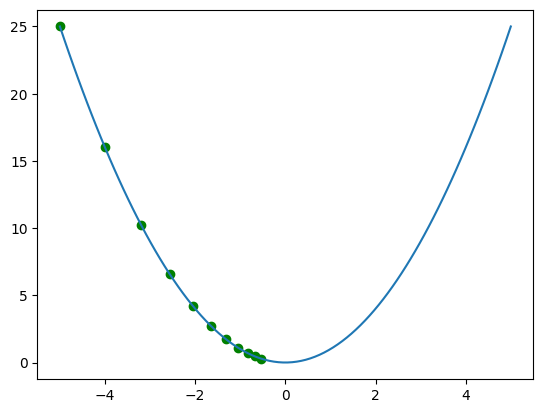

In [38]:
def f(x):
    return x**2

def grad_f(x):
    return 2*x

xk_vals, k, f_vals, grad_vls, err_vals = gradient_descent(f, grad_f, x0=-5, tolf=1e-12, tolx=1e-12, kmax=10, alpha=1e-1)

x_vals = np.linspace(-5, 5, 100)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals)
plt.scatter(xk_vals, f_vals, c='green')

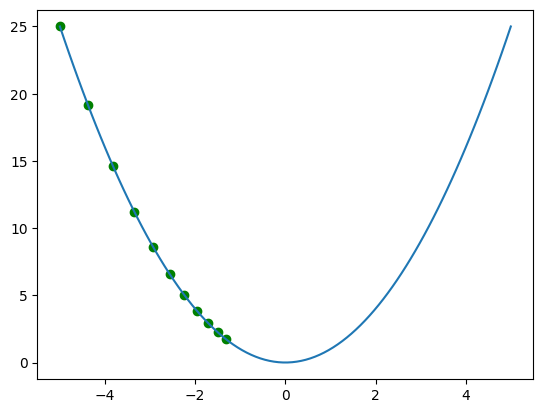

In [39]:
def f(x):
    return x**2

def grad_f(x):
    return 2*x

xk_vals, k, f_vals, grad_vals, err_vals = gradient_descent(f, grad_f, x0=-5, tolf=1e-12, tolx=1e-12, kmax=10, alpha=backtracking(f, grad_f, -5), bt=True)

x_vals = np.linspace(-5, 5, 100)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals)
plt.scatter(xk_vals, f_vals, c='green')

HOMEWORKING STARTING

In [40]:
def f(x):
    return (2*(x[0])**2 + (x[1]-2)**2)
def grad_f(x):
    return np.array((4*x[0], 2*x[1] - 4))

def my_plot(xk_vals, k, f_vals, grad_valks, err_vals, f, title):
    xv = np.linspace(-10, 10, 100).T
    yv = np.linspace(-10, 10, 100).T

    xx,yy = np.meshgrid(xv, yv)
    
    zz = f([xx, yy])

    xk_vals = np.array(xk_vals)

    plt.plot(xk_vals[:,0], xk_vals[:,1], '--ro')

    plt.contour(xx, yy, zz)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid()
    plt.show()

def my_plot_2D(xk_vals, k, f_vals, grad_valks, err_vals, f, title):
    x_vals = np.linspace(-3, 3, 100)
    y_vals = []
    for x in x_vals:
        y_vals.append(f([x]))
    plt.plot(x_vals, y_vals)
    plt.scatter(xk_vals, f_vals, c='green')
    plt.title(title)
    plt.show()

def plot_error(iters, errs, labels, title = "Error (2-norms of gradient)"):
    colors = []

    for i in range (len(iters)):
        colors.append('#%06X' % randint(0, 0xFFFFFF))

    colors = plt.get_cmap("tab20c")
    i= 0

    for item in zip(iters, errs, labels):
        plt.plot(item[0], item[1], c=colors(i/(len(iters)-1)), label = item[2])
        i+=1
    plt.title(title)
    
    plt.legend(loc="upper left")
    plt.show()

In [41]:
def function_testing(f, grad_f, x0=0, title="", alpha = 1e-1, bt = False, oneD = False, check_err = False, xtrue = None, isMatr = False):
    tolf = 1e-8
    tolx = 1e-8
    kmax = 100
    if not bt:
        xk_vals, k, f_vals, grad_vals, err_vals = gradient_descent(f, grad_f, x0, tolf, tolx, kmax, alpha)
    else:
        alpha_bt = backtracking(f, grad_f, x0)
        xk_vals, k, f_vals, grad_vals, err_vals = gradient_descent(f, grad_f, x0, tolf, tolx, kmax, alpha_bt, bt=True)
    if not oneD and not isMatr:
        if not bt:
            my_plot(xk_vals, k, f_vals, grad_vals, err_vals, f, title + " with alpha= " + str(alpha))
        else:
            my_plot(xk_vals, k, f_vals, grad_vals, err_vals, f, title + " with backtracking")
    elif not isMatr:
        if not bt:
            my_plot_2D(xk_vals, k, f_vals, grad_vals, err_vals, f, title + " with alpha= " + str(alpha))
        else:
            my_plot_2D(xk_vals, k, f_vals, grad_vals, err_vals, f, title + " with backtracking")
    print("Minimum Found =", xk_vals[k-1], "with", k, "iterations")
    
    to_ret = []
    if check_err:
        if not isMatr:
            for xk in xk_vals:
                to_ret.append(np.linalg.norm((xk - xtrue)))
        else:
            xtrue = np.array(xtrue)
            for xk in xk_vals:
                xk = np.array(xk)
                to_ret.append(np.linalg.norm((xk - xtrue)))
    
    if check_err:
        return np.arange(k+1), err_vals, to_ret
    return np.arange(k+1), err_vals

In [42]:
lam = random.random()
def f1(x):
    return ((x[0] - 3)**2 + (x[1] - 1)**2)
def f2(x):
    return (10*(x[0] - 1)**2 + (x[1] - 2)**2)
def f3(x):
    x = np.array(x).T
    n = len(x)
    v = np.linspace(0, 1, n)
    A = np.vander(v)
    x_true = np.ones(n).T
    b= A @ x_true

    return ((np.linalg.norm((A @ x) - b)**2)/2)
def f4(x):
    n = len(x)
    v = np.linspace(0, 1, n)
    A = np.vander(v)
    x_true = np.ones(n).T
    b= A @ x_true

    return (((np.linalg.norm((A @ x) - b)**2)/2) + ((np.linalg.norm(x))**2)*lam/2)
def f5(x):
    return x[0]**4 + x[0]**3 - 2*(x[0]**2) - 2*x[0]

In [43]:
def grad_f1(x):
    return np.array((2*x[0] - 6, 2*x[1] - 2))
def grad_f2(x):
    return np.array(20*(x[0] - 1), 2*(x[1] - 2))
def grad_f3(x):
    n = len(x)     
    v = np.linspace(0,1,n)
    A = np.vander(v)   
    x_true = np.ones(n).T    
    b = A @ x_true   
    return A.T@(A@x-b)
def grad_f4(x):
    return grad_f3(x) + lam*np.array(x)
def grad_f5(x):
    return np.array(4*x[0]**3 + 3*x[0]**2 - 4*x[0] - 2)

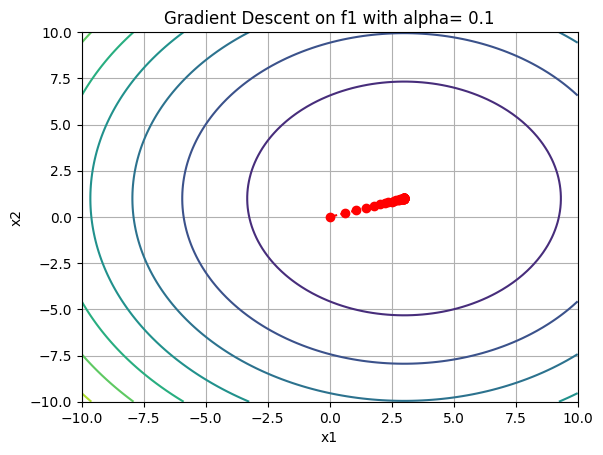

Minimum Found = [2.99999997 0.99999999] with 83 iterations


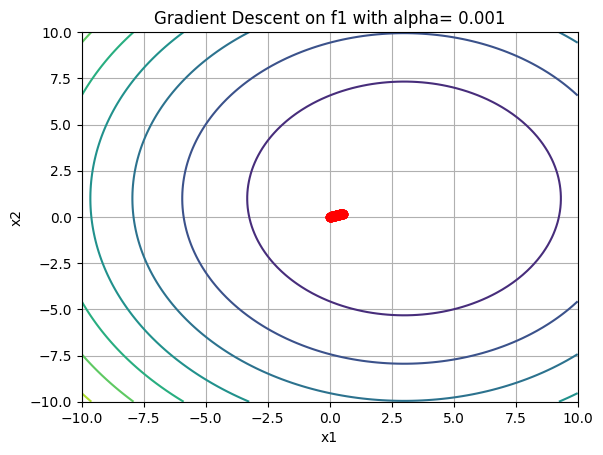

Minimum Found = [0.53937834 0.17979278] with 100 iterations


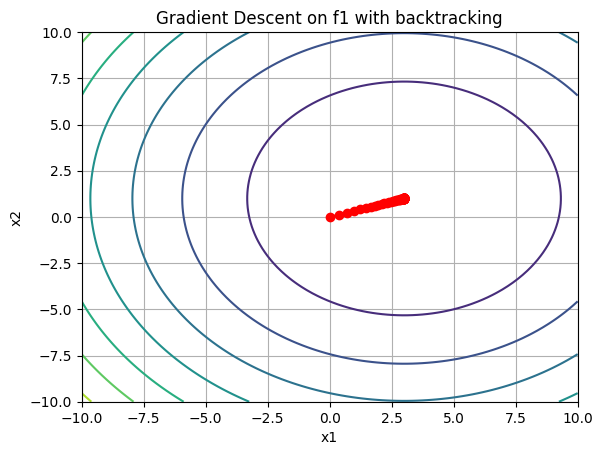

Minimum Found = [2.99999456 0.99999819] with 100 iterations


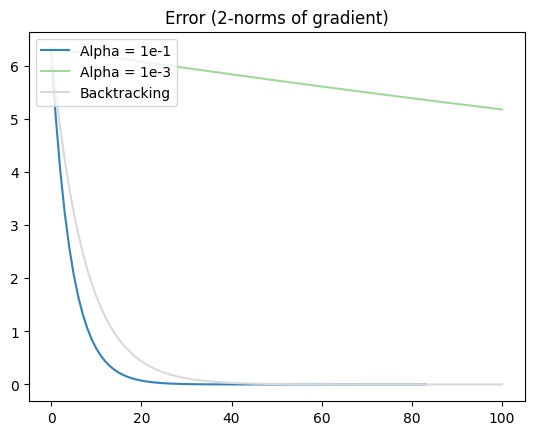

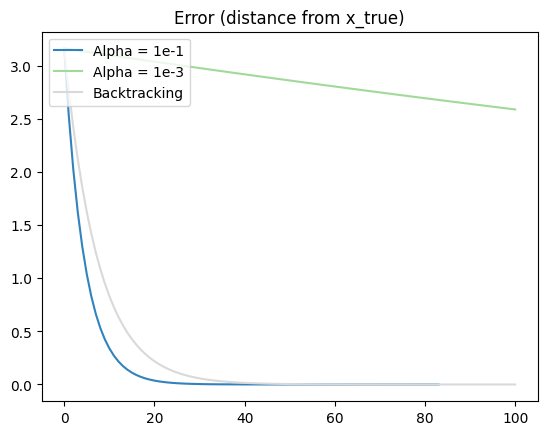

In [44]:
iters = []
err_vals = []
labels = []
err_xtrue = []
xtrue = np.array([3,1]).T

el1, el2, el3 = function_testing(f1, grad_f1, x0 = np.array((0, 0)), title="Gradient Descent on f1", alpha=1e-1, check_err = True, xtrue = xtrue)
iters.append(el1)
err_vals.append(el2)
labels.append("Alpha = 1e-1")
err_xtrue.append(el3)

el1, el2, el3 = function_testing(f1, grad_f1, x0 = np.array((0, 0)), title="Gradient Descent on f1", alpha=1e-3, check_err = True, xtrue = xtrue)
iters.append(el1)
err_vals.append(el2)
labels.append("Alpha = 1e-3")
err_xtrue.append(el3)

el1, el2, el3 = function_testing(f1, grad_f1, x0 = np.array((0, 0)), title="Gradient Descent on f1", bt = True, check_err = True, xtrue = xtrue)
iters.append(el1)
err_vals.append(el2)
labels.append("Backtracking")
err_xtrue.append(el3)

plot_error(iters, err_vals, labels)
plot_error(iters, err_xtrue, labels, title="Error (distance from x_true)")


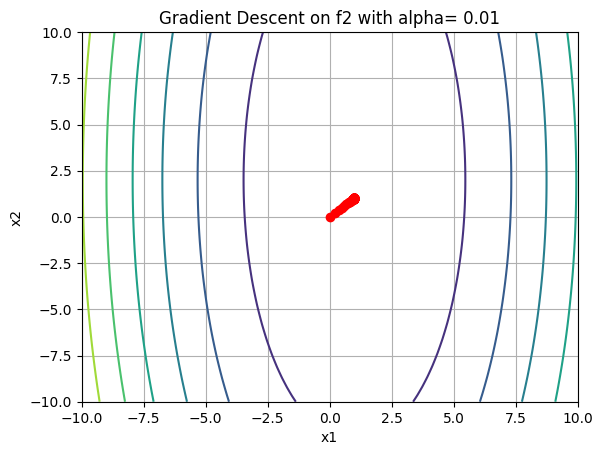

Minimum Found = [0.99999999 0.99999999] with 83 iterations


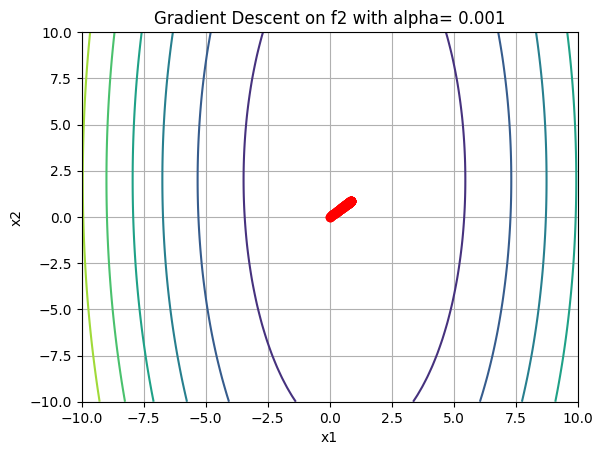

Minimum Found = [0.86467392 0.86467392] with 100 iterations


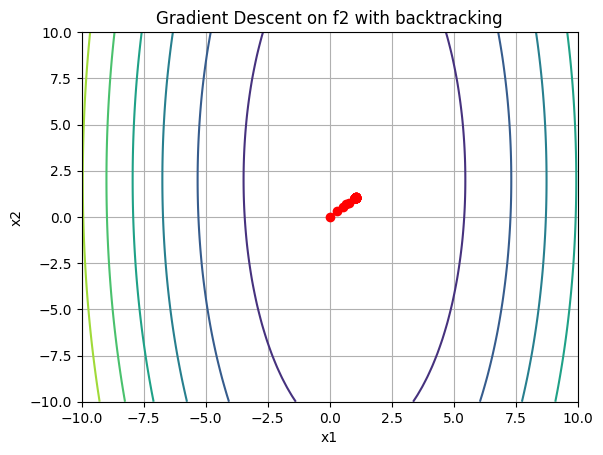

Minimum Found = [1.00874589 1.00874589] with 100 iterations


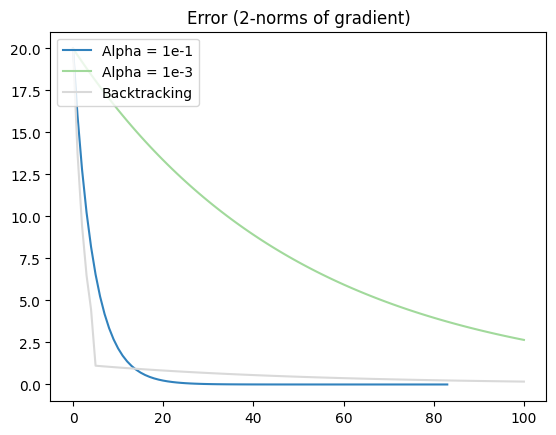

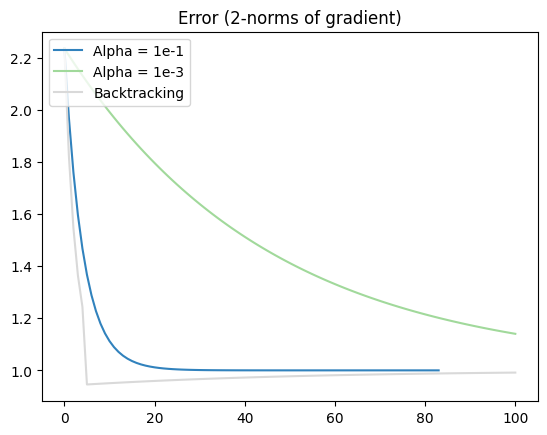

In [45]:
iters = []
err_vals = []
labels = []
err_xtrue = []
xtrue = np.array([1,2]).T

el1, el2, el3 = function_testing(f2, grad_f2, x0 = np.array((0, 0)), title="Gradient Descent on f2", alpha=1e-2, check_err=True, xtrue=xtrue)
iters.append(el1)
err_vals.append(el2)
labels.append("Alpha = 1e-1")
err_xtrue.append(el3)

el1, el2, el3 = function_testing(f2, grad_f2, x0 = np.array((0, 0)), title="Gradient Descent on f2", alpha=1e-3, check_err=True, xtrue=xtrue)
iters.append(el1)
err_vals.append(el2)
labels.append("Alpha = 1e-3")
err_xtrue.append(el3)

el1, el2, el3 = function_testing(f2, grad_f2, x0 = np.array((0, 0)), title="Gradient Descent on f2", bt = True, check_err=True, xtrue=xtrue)
iters.append(el1)
err_vals.append(el2)
labels.append("Backtracking")
err_xtrue.append(el3)

plot_error(iters, err_vals, labels)
plot_error(iters, err_xtrue, labels)

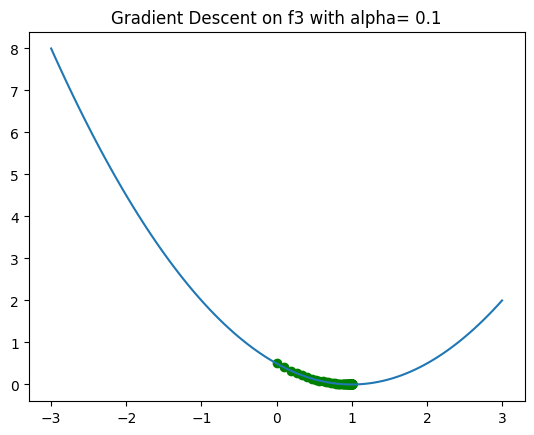

Minimum Found = [0.99997049] with 100 iterations


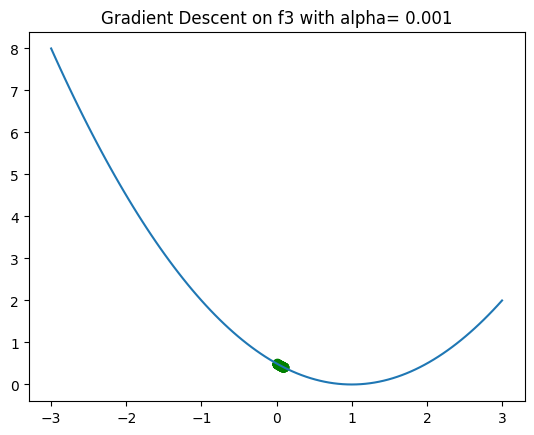

Minimum Found = [0.09430216] with 100 iterations


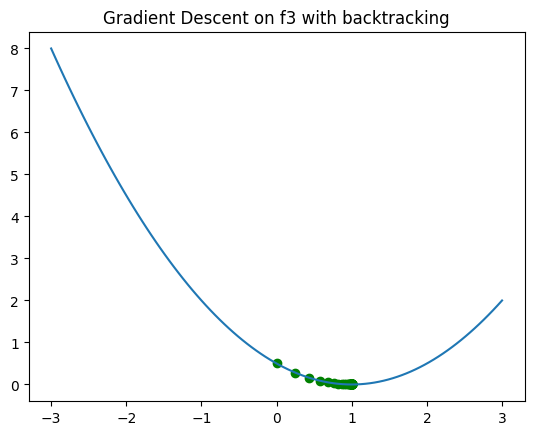

Minimum Found = [0.99999999] with 65 iterations


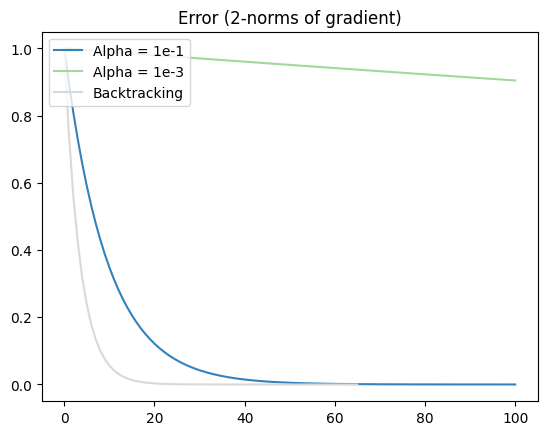

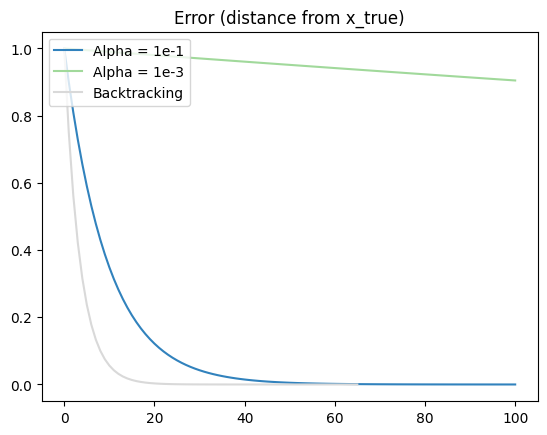

In [46]:
iters = []
err_vals = []
labels = []
err_xtrue = []
xtrue = np.ones(1).T

el1, el2, el3 = function_testing(f3, grad_f3, x0 = [0], title="Gradient Descent on f3", alpha=1e-1, check_err = True, xtrue = xtrue, oneD = True)
iters.append(el1)
err_vals.append(el2)
labels.append("Alpha = 1e-1")
err_xtrue.append(el3)

el1, el2, el3 = function_testing(f3, grad_f3, x0 = [0], title="Gradient Descent on f3", alpha=1e-3, check_err = True, xtrue = xtrue, oneD = True)
iters.append(el1)
err_vals.append(el2)
labels.append("Alpha = 1e-3")
err_xtrue.append(el3)

el1, el2, el3 = function_testing(f3, grad_f3, x0 = [0], title="Gradient Descent on f3", bt = True, check_err = True, xtrue = xtrue, oneD = True)
iters.append(el1)
err_vals.append(el2)
labels.append("Backtracking")
err_xtrue.append(el3)

plot_error(iters, err_vals, labels)
plot_error(iters, err_xtrue, labels, title="Error (distance from x_true)")

Minimum Found = [0.99415113 1.0036148 ] with 100 iterations
Minimum Found = [0.17566216 0.26128868] with 100 iterations
Minimum Found = [0.9999999  1.00000006] with 74 iterations


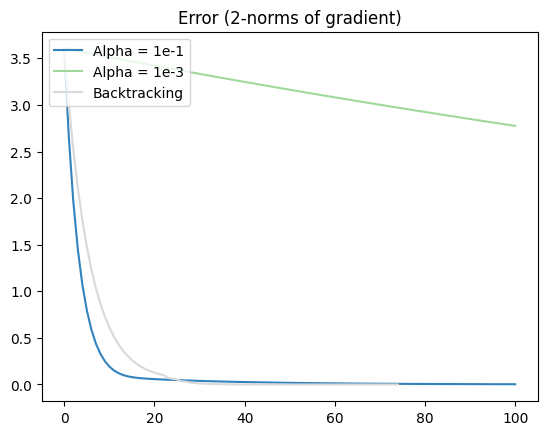

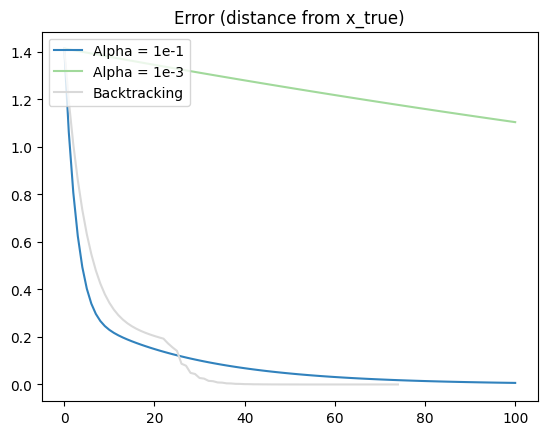

In [47]:
iters = []
err_vals = []
labels = []
err_xtrue = []
xtrue = np.ones(2).T

el1, el2, el3 = function_testing(f3, grad_f3, x0 = [0, 0], title="Gradient Descent on f3", alpha=1e-1, check_err = True, xtrue = xtrue, isMatr = True)
iters.append(el1)
err_vals.append(el2)
labels.append("Alpha = 1e-1")
err_xtrue.append(el3)

el1, el2, el3 = function_testing(f3, grad_f3, x0 = [0, 0], title="Gradient Descent on f3", alpha=1e-3, check_err = True, xtrue = xtrue, isMatr = True)
iters.append(el1)
err_vals.append(el2)
labels.append("Alpha = 1e-3")
err_xtrue.append(el3)

el1, el2, el3 = function_testing(f3, grad_f3, x0 = [0, 0], title="Gradient Descent on f3", bt = True, check_err = True, xtrue = xtrue, isMatr = True)
iters.append(el1)
err_vals.append(el2)
labels.append("Backtracking")
err_xtrue.append(el3)

plot_error(iters, err_vals, labels)
plot_error(iters, err_xtrue, labels, title="Error (distance from x_true)")

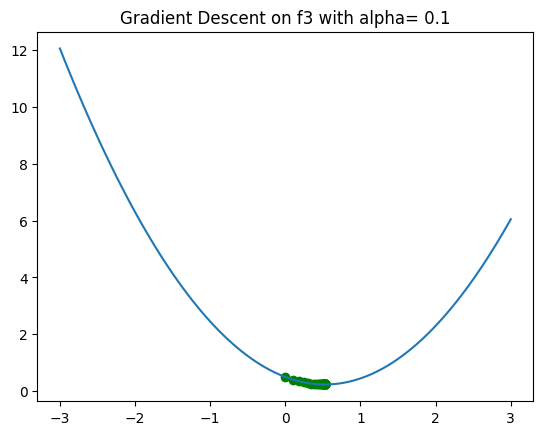

Minimum Found = [0.52648326] with 88 iterations


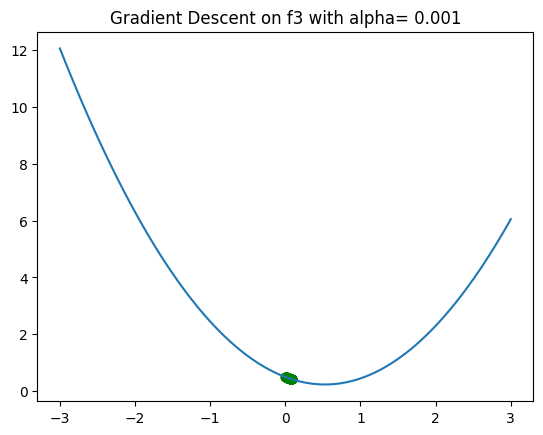

Minimum Found = [0.09032701] with 100 iterations


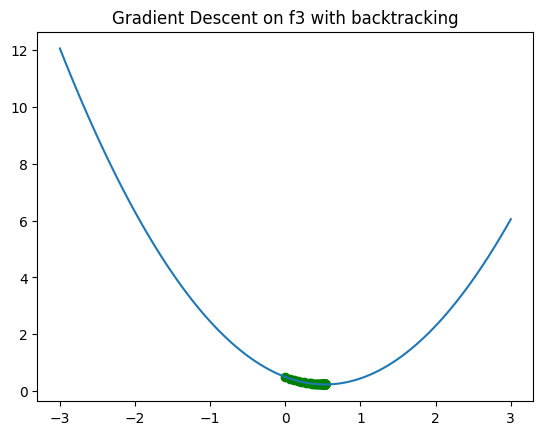

Minimum Found = [0.52648132] with 100 iterations


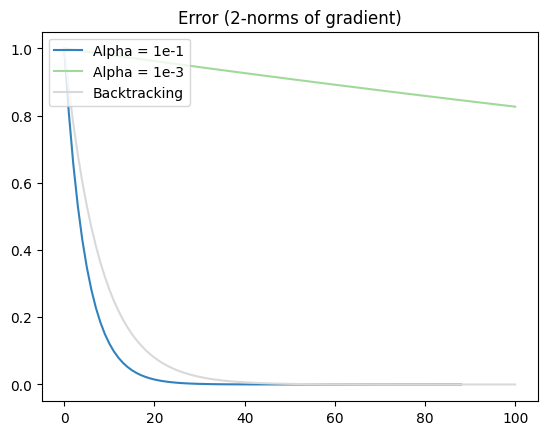

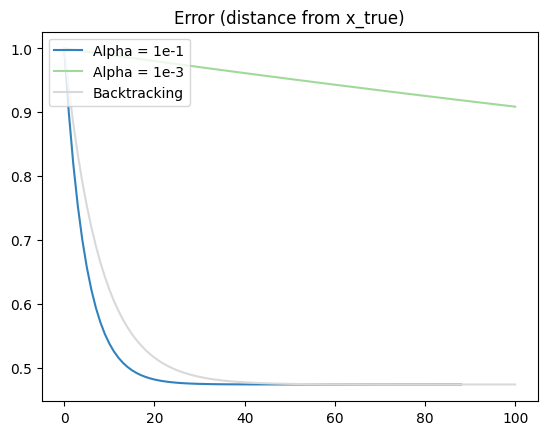

In [48]:
iters = []
err_vals = []
labels = []
err_xtrue = []
xtrue = np.ones(1).T

el1, el2, el3 = function_testing(f4, grad_f4, x0 = [0], title="Gradient Descent on f3", alpha=1e-1, check_err = True, xtrue = xtrue, oneD = True)
iters.append(el1)
err_vals.append(el2)
labels.append("Alpha = 1e-1")
err_xtrue.append(el3)

el1, el2, el3 = function_testing(f4, grad_f4, x0 = [0], title="Gradient Descent on f3", alpha=1e-3, check_err = True, xtrue = xtrue, oneD = True)
iters.append(el1)
err_vals.append(el2)
labels.append("Alpha = 1e-3")
err_xtrue.append(el3)

el1, el2, el3 = function_testing(f4, grad_f4, x0 = [0], title="Gradient Descent on f3", bt = True, check_err = True, xtrue = xtrue, oneD = True)
iters.append(el1)
err_vals.append(el2)
labels.append("Backtracking")
err_xtrue.append(el3)

plot_error(iters, err_vals, labels)
plot_error(iters, err_xtrue, labels, title="Error (distance from x_true)")

Minimum Found = [0.62097384 0.82052488] with 100 iterations
Minimum Found = [0.16843103 0.25056481] with 100 iterations
Minimum Found = [0.62097392 0.82052483] with 63 iterations


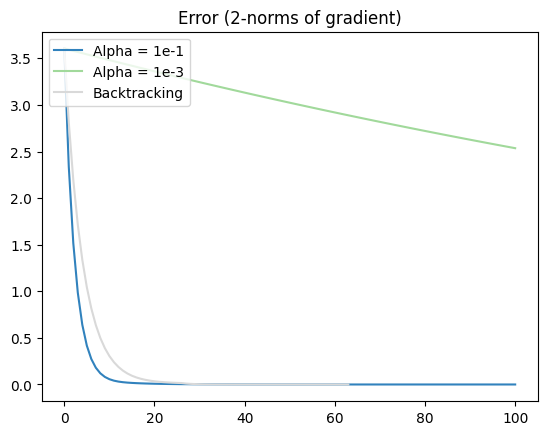

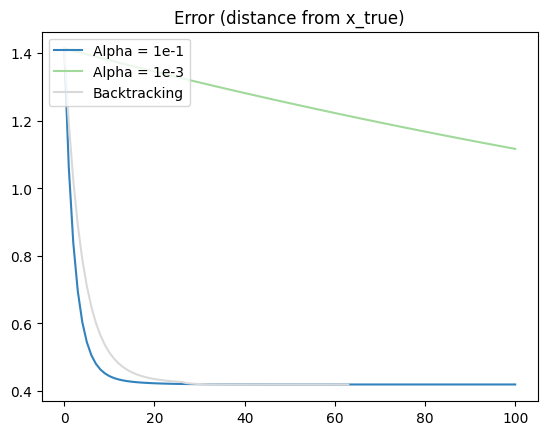

In [49]:
iters = []
err_vals = []
labels = []
err_xtrue = []
xtrue = np.ones(2).T

el1, el2, el3 = function_testing(f4, grad_f4, x0 = [0, 0], title="Gradient Descent on f3", alpha=1e-1, check_err = True, xtrue = xtrue, isMatr = True)
iters.append(el1)
err_vals.append(el2)
labels.append("Alpha = 1e-1")
err_xtrue.append(el3)

el1, el2, el3 = function_testing(f4, grad_f4, x0 = [0, 0], title="Gradient Descent on f3", alpha=1e-3, check_err = True, xtrue = xtrue, isMatr = True)
iters.append(el1)
err_vals.append(el2)
labels.append("Alpha = 1e-3")
err_xtrue.append(el3)

el1, el2, el3 = function_testing(f4, grad_f4, x0 = [0, 0], title="Gradient Descent on f3", bt = True, check_err = True, xtrue = xtrue, isMatr = True)
iters.append(el1)
err_vals.append(el2)
labels.append("Backtracking")
err_xtrue.append(el3)

plot_error(iters, err_vals, labels)
plot_error(iters, err_xtrue, labels, title="Error (distance from x_true)")

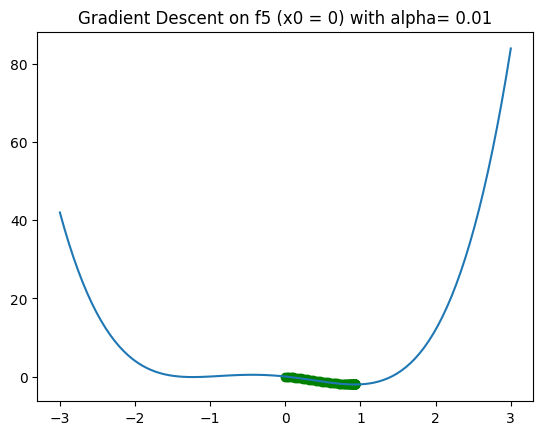

Minimum Found = [0.92218317] with 100 iterations


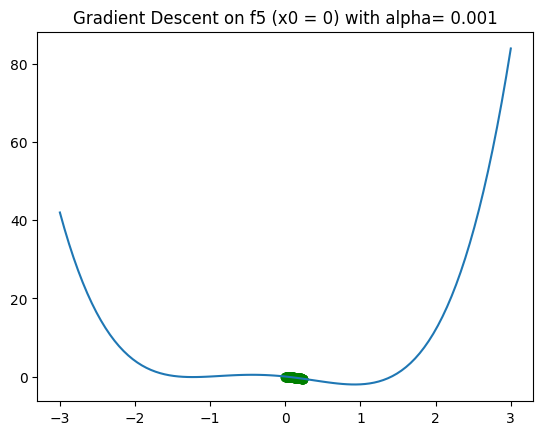

Minimum Found = [0.23560406] with 100 iterations


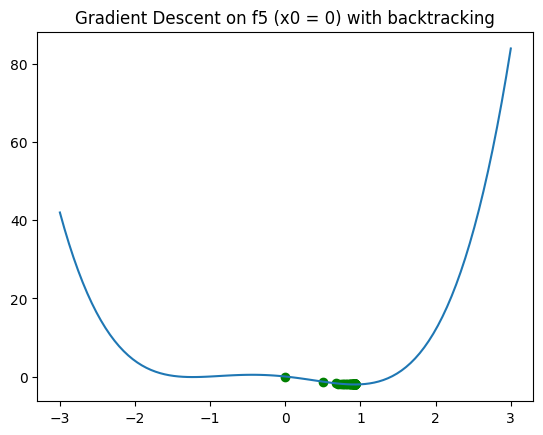

Minimum Found = [0.9222248] with 95 iterations


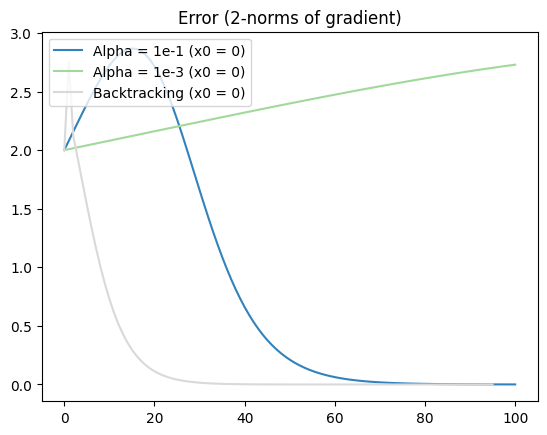

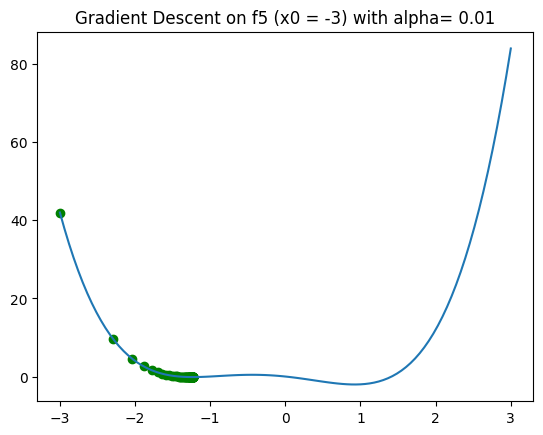

Minimum Found = [-1.23255127] with 100 iterations


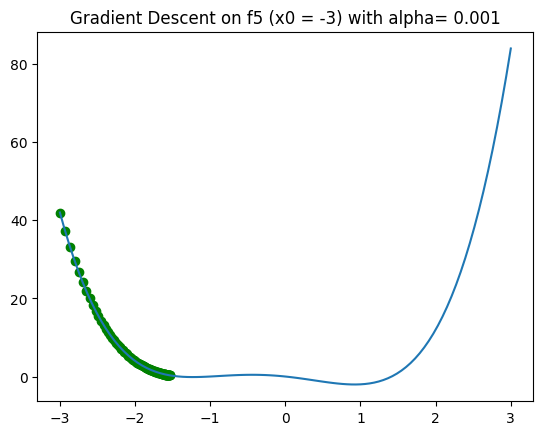

Minimum Found = [-1.53828361] with 100 iterations


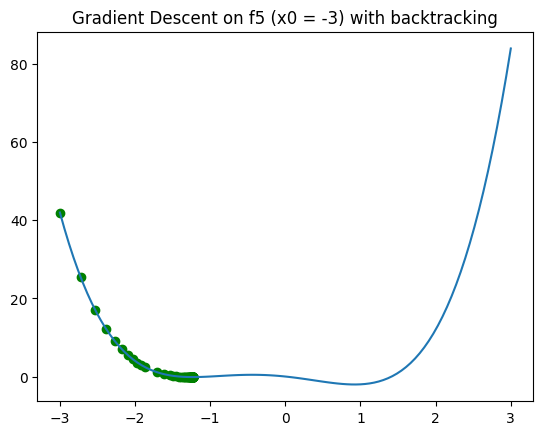

Minimum Found = [-1.23225111] with 100 iterations


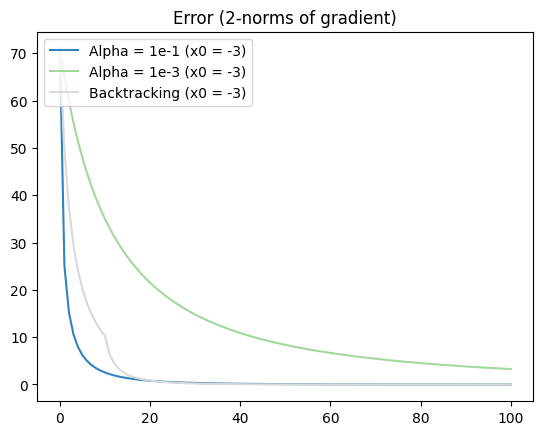

In [50]:
iters = []
err_vals = []
labels = []

el1, el2 = function_testing(f5, grad_f5, x0 = [0], title="Gradient Descent on f5 (x0 = 0)", alpha=1e-2, oneD = True)
iters.append(el1)
err_vals.append(el2)
labels.append("Alpha = 1e-1 (x0 = 0)")

el1, el2 = function_testing(f5, grad_f5, x0 = [0], title="Gradient Descent on f5 (x0 = 0)", alpha=1e-3, oneD = True)
iters.append(el1)
err_vals.append(el2)
labels.append("Alpha = 1e-3 (x0 = 0)")

el1, el2 = function_testing(f5, grad_f5, x0 = [0], title="Gradient Descent on f5 (x0 = 0)", bt = True, oneD = True)
iters.append(el1)
err_vals.append(el2)
labels.append("Backtracking (x0 = 0)")

plot_error(iters, err_vals, labels)
iters = []
err_vals = []
labels = []

el1, el2 = function_testing(f5, grad_f5, x0 = [-3], title="Gradient Descent on f5 (x0 = -3)", alpha=1e-2, oneD = True)
iters.append(el1)
err_vals.append(el2)
labels.append("Alpha = 1e-1 (x0 = -3)")

el1, el2 = function_testing(f5, grad_f5, x0 = [-3], title="Gradient Descent on f5 (x0 = -3)", alpha=1e-3, oneD = True)
iters.append(el1)
err_vals.append(el2)
labels.append("Alpha = 1e-3 (x0 = -3)")

el1, el2 = function_testing(f5, grad_f5, x0 = [-3], title="Gradient Descent on f5 (x0 = -3)", bt = True, oneD = True)
iters.append(el1)
err_vals.append(el2)
labels.append("Backtracking (x0 = -3)")

plot_error(iters, err_vals, labels)

STOCHASTIC GRADIENT DESCENT

In [51]:
# Utils

def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

def f(w, xhat):
    return sigmoid(xhat.T @ w)

def grad_f(w, xhat):
    return (sigmoid(xhat.T @ w) * (1 - sigmoid(xhat.T @ w)) * xhat.T)

def MSE(f_w_x, y):
    return np.linalg.norm((f_w_x-y))**2

def grad_MSE(grad_f_w_x, f_w_x, y):
    return grad_f_w_x.T * (f_w_x - y)

def ell(w, X, Y):
    d, N = X.shape

    mse_sum = 0
    for i in range(0, N):
        mse_sum+=MSE(f(w, X[:, i]), Y[i])

    return mse_sum / N

def grad_ell(w, X, Y):
    d, N = X.shape

    grad_mse_sum = 0
    for i in range(0, N):
        grad_mse_sum += grad_MSE(np.array(grad_f(w, X[:, i])), f(w, X[:, i]), Y[i])

    return grad_mse_sum / N


In [52]:
def SGD(l, grad_l, w0, D, batch_size, n_epochs):
    alpha = 1e-3


    X, Y = D
    X_backup = X
    Y_backup = Y
    d, N = X.shape

    Xhat = np.concatenate((np.ones((1,N)), X), axis=0)

    n_batch_per_epoch = N // batch_size
    w_vals = [w0]
    f_vals = [l(w0, Xhat, Y)]
    grad_f_vals = [grad_l(w0, Xhat, Y)]
    err_vals = [np.linalg.norm(grad_l(w0, Xhat, Y))]

    for epoch in range(n_epochs):
        idx = np.arange(N)
        np.random.shuffle(idx)

        for k in range(n_batch_per_epoch):
            batch_indices = idx[k * batch_size : (k + 1) * batch_size]

            Mx = Xhat[:, batch_indices]
            My = Y[batch_indices]
            M = (Mx, My)


            w = w0 - alpha * grad_l(w0, Mx, My)
            w_vals.append(w)

            w0 = w

        X = X_backup
        Y = Y_backup
        f_vals.append(l(w, Xhat, Y))
        grad_f_vals.append(grad_l(w, Xhat, Y))
        err_vals.append(np.linalg.norm(grad_l(w, Xhat, Y)))
    
    return w, f_vals, grad_f_vals, err_vals


In [53]:
def x_split(X, Y, N_train):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:N_train]
    test_idx = idx[N_train:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]

    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return Xtrain, Xtest, Ytrain, Ytest

def get_digits(X, Y, chosen_numbers):
    I = [idx for idx, elem in enumerate(Y) if elem in chosen_numbers]
    X_def = X[:, I]
    Y_def = Y[I]
    
    return X_def, Y_def

In [54]:
import pandas as pd

In [55]:
data = pd.read_csv("./data.csv")
data = np.array(data)

In [56]:
X = data[:, 1:].T
Y = data[:, 0]

chosen_digits = []
chosen_digits.append(int(input("Insert first number")))
chosen_digits.append(int(input("Insert second number")))

In [57]:
X_set, Y_set = get_digits(X, Y, chosen_digits)

In [58]:
d, N = X_set.shape
N_train = int(N/3*2)
Y_set[Y_set == chosen_digits[0]] = 0
Y_set[Y_set == chosen_digits[1]] = 1

X_train, X_test, Y_train, Y_test = x_split(X_set, Y_set, N_train)

D = (X_train, Y_train)

In [59]:
d, N = X_train.shape
w0 = np.random.normal(0, 0.1, d+1)
batch_size = 15
n_epochs = 50
w, f_vals, grad_vals, err_vals = SGD(ell, grad_ell, w0, D, batch_size, n_epochs)

/tmp/ipykernel_4083/718066766.py:4: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


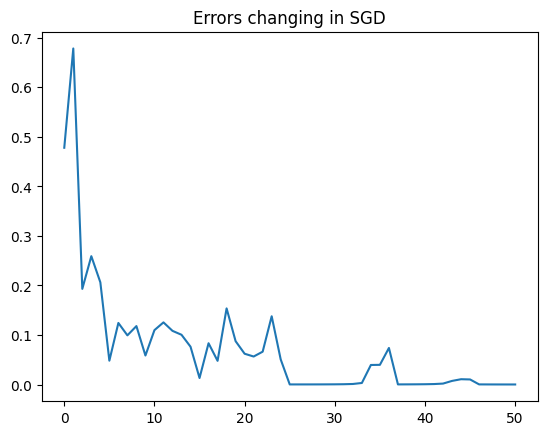

In [60]:
x_plot = np.arange(n_epochs+1)
plt.plot(x_plot, err_vals)
plt.title("Errors changing in SGD")
plt.show()

In [61]:
def acc(app, Y, chosen_indeces):
    tot = 0
    for i in range(len(Y)):
        if (int(app[i]) == Y[i]):
            tot+=1
    return tot, tot/len(Y)

def predict(w, X, threshold = 0.5):
    d, N = X.shape
    app = np.zeros(N)
    for i in range(N):
        result = f(w, X[:, i])
        if (result >= threshold):
            app[i] = 1
        else:
            app[i] = 0
    return app

In [62]:
Xt = X_train.copy()
Yt = Y_train.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
app = predict(w, Xthat)
tot, avg = acc(app, Yt, chosen_digits)
print("Matches on Train Set:", int(tot))
print("Total entries on Train Set:", int(Yt.shape[0]))
print("Accuracy on Train Set:", round(avg*100, 2))

Xt = X_test.copy()
Yt = Y_test.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
app = predict(w, Xthat)
tot, avg = acc(app, Yt, chosen_digits)
print("Matches on Test Set:", int(tot))
print("Total entries on Test Set:", int(Yt.shape[0]))
print("Accuracy on Test Set:", round(avg*100, 2))

Matches on Train Set: 5509
Total entries on Train Set: 5550
Accuracy on Train Set: 99.26
Matches on Test Set: 2749
Total entries on Test Set: 2775
Accuracy on Test Set: 99.06


/tmp/ipykernel_4083/718066766.py:4: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


GD

In [71]:
def GD_2(l, grad_l, w0, D, tolf = 1e-9, tolx= 1e-9, kmax = 50, alpha = 1e-1):
    X, Y = D
    d, N = X.shape

    Xhat = np.concatenate((np.ones((1,N)), X), axis=0)
    
    w_vals = [w0]
    f_vals = [l(w0, Xhat, Y)]
    grad_f_vals = [grad_l(w0, Xhat, Y)]
    err_vals = [np.linalg.norm(grad_l(w0, Xhat, Y))]

    iterations = 0

    while iterations < kmax:
        w = w_vals[-1] - alpha * grad_l(w_vals[-1], Xhat, Y)

        w_vals.append(w)
        f_vals.append(l(w, Xhat, Y))
        grad_f_vals.append(grad_l(w, Xhat, Y))
        err_vals.append(np.linalg.norm(grad_l(w, Xhat, Y)))

        iterations+=1

        if err_vals[-1] < tolf * err_vals[0]:
            break

        if np.linalg.norm(w_vals[-1] - w_vals[-2]) < tolx * np.linalg.norm(w_vals[0]):
            break

    return (w, f_vals, grad_f_vals, err_vals, iterations)
    

In [72]:
w_gd, f_vals_gd, grad_vals_gd, err_vals_gd, iterations_gd = GD_2(ell, grad_ell, w0, D)

/tmp/ipykernel_4083/718066766.py:4: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


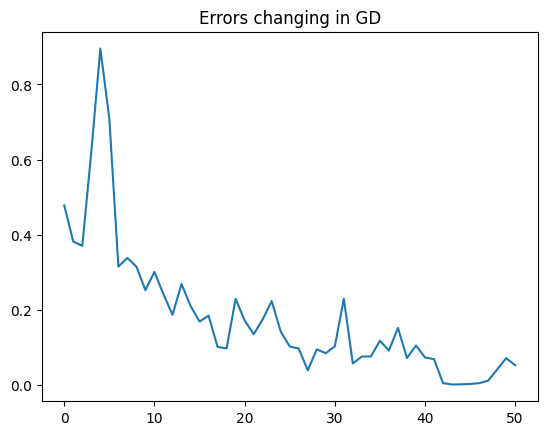

In [73]:
x_plot = np.arange(len(err_vals_gd))
plt.plot(x_plot, err_vals_gd)
plt.title("Errors changing in GD")
plt.show()

In [74]:
Xt = X_train.copy()
Yt = Y_train.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
app = predict(w_gd, Xthat)
tot, avg = acc(app, Yt, chosen_digits)
print("Matches on Train Set:", int(tot))
print("Total entries on Train Set:", int(Yt.shape[0]))
print("Accuracy on Train Set:", round(avg*100, 2))

Xt = X_test.copy()
Yt = Y_test.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
app = predict(w_gd, Xthat)
tot, avg = acc(app, Yt, chosen_digits)
print("Matches on Test Set:", int(tot))
print("Total entries on Test Set:", int(Yt.shape[0]))
print("Accuracy on Test Set:", round(avg*100, 2))

Matches on Train Set: 5480
Total entries on Train Set: 5550
Accuracy on Train Set: 98.74
Matches on Test Set: 2733
Total entries on Test Set: 2775
Accuracy on Test Set: 98.49


/tmp/ipykernel_4083/718066766.py:4: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))
